In [1]:
from datetime import datetime
#target_code = '033340'
date_from = '2015-1-1'
# date_from  = '2010-1-1'
today=  datetime.now().strftime('%Y-%m-%d')
today= '2021-11-11'

In [2]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [3]:
# 종목 코드 검색하기
target_name = "LG생활건강"
df = pd.read_csv("marcap/data/marcap-2021.csv.gz")
target_code = df[df["Name"] == target_name]["Code"].iloc[0]
target_code

'051900'

In [4]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 

pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = marcap_data(date_from, today, target_code)

In [6]:
import pandas_ta as ta

In [7]:
df.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio
Date,,,,,,,,,,,,,,,,,,
2015-01-02,051900,LG생활건강,KOSPI,NaN,618000.00,2,-5000.00,-0.80,615000.00,620000.00,610000.00,23066.00,14186599800.00,9652045746000.00,15618197.00,STK,24,NaN
2015-01-05,051900,LG생활건강,KOSPI,NaN,610000.00,2,-8000.00,-1.29,615000.00,622000.00,609000.00,27781.00,17059980000.00,9527100170000.00,15618197.00,STK,25,NaN
2015-01-06,051900,LG생활건강,KOSPI,NaN,606000.00,2,-4000.00,-0.66,610000.00,618000.00,596000.00,34268.00,20746831000.00,9464627382000.00,15618197.00,STK,25,NaN
2015-01-07,051900,LG생활건강,KOSPI,NaN,600000.00,2,-6000.00,-0.99,605000.00,610000.00,597000.00,29868.00,17940749000.00,9370918200000.00,15618197.00,STK,25,NaN
2015-01-08,051900,LG생활건강,KOSPI,NaN,613000.00,1,13000.00,2.17,597000.00,620000.00,596000.00,50053.00,30231002000.00,9573954761000.00,15618197.00,STK,25,NaN


In [8]:
df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN
...,...,...,...
2021-11-04,-44290.88,-8846.80,-35444.08
2021-11-05,-43491.77,-6438.15,-37053.62
2021-11-08,-42689.13,-4508.41,-38180.72


In [9]:
print(df)

              Code    Name Market Dept      Close  ChangeCode   Changes  \
Date                                                                      
2015-01-02  051900  LG생활건강  KOSPI  NaN  618000.00           2  -5000.00   
2015-01-05  051900  LG생활건강  KOSPI  NaN  610000.00           2  -8000.00   
2015-01-06  051900  LG생활건강  KOSPI  NaN  606000.00           2  -4000.00   
2015-01-07  051900  LG생활건강  KOSPI  NaN  600000.00           2  -6000.00   
2015-01-08  051900  LG생활건강  KOSPI  NaN  613000.00           1  13000.00   
...            ...     ...    ...  ...        ...         ...       ...   
2021-11-04  051900  LG생활건강  KOSPI  NaN 1239000.00           1   8000.00   
2021-11-05  051900  LG생활건강  KOSPI  NaN 1229000.00           2 -10000.00   
2021-11-08  051900  LG생활건강  KOSPI  NaN 1225000.00           2  -4000.00   
2021-11-09  051900  LG생활건강  KOSPI  NaN 1219000.00           2  -6000.00   
2021-11-10  051900  LG생활건강  KOSPI  NaN 1191000.00           2 -28000.00   

            ChagesRatio 

In [10]:
from plotly.subplots import *
fig = make_subplots(rows=3, cols=1)


In [11]:
import plotly.graph_objects as go
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['Open'],
        line=dict(color='#ff9900', width=1),
        name='open',
        legendgroup='1',
    ), row=1, col=1
)

In [12]:
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
    ), row=1, col=1
)

In [13]:
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['MACD_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        legendgroup='2'
    ), row=2, col=1
)

In [14]:
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['MACDs_12_26_9'],
        line=dict(color='#000000', width=2),
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)

In [15]:
import numpy as np
colors = np.where(df['MACDh_12_26_9'] < 0, '#000', '#ff9900')
fig.append_trace(
    go.Bar(
        x=df.index,
        y=df['MACDh_12_26_9'],
        name='histogram',
        marker_color=colors
    ), row=3, col=1
)

In [19]:
layout = go.Layout(
    plot_bgcolor='#efefef',
    font_family='Monospace',
    font_color='#000000',
    font_size=10,
    margin=dict(l=20, r=20, t=20, b=20),
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    ),
    height=800
)

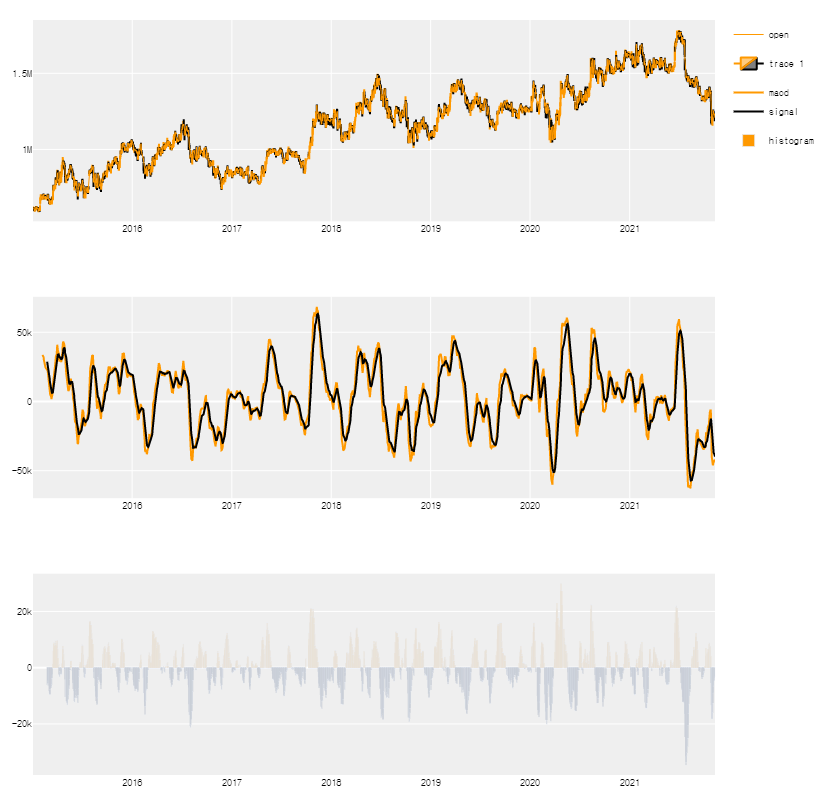

In [20]:
fig.update_layout(layout)
fig.show()

In [47]:
import math
MACD = 'MACD_12_26_9'
first_index = 0
temp_macd = 0
for index, row in df.iterrows():
    if not math.isnan(row['MACD_12_26_9']):
        first_index = index
        temp_macd = row[MACD]
        break

print(first_index)
for index, row in df.iterrows():
    if index > first_index:
        if row[MACD] * temp_macd < 0:
            temp_macd = row[MACD]
            print(index)


2015-02-06 00:00:00
2015-06-01 00:00:00
2015-07-27 00:00:00
2015-08-24 00:00:00
2015-09-16 00:00:00
2016-01-14 00:00:00
2016-03-21 00:00:00
2016-07-27 00:00:00
2016-09-23 00:00:00
2016-09-30 00:00:00
2016-12-14 00:00:00
2017-02-10 00:00:00
2017-02-27 00:00:00
2017-03-03 00:00:00
2017-04-21 00:00:00
2017-07-10 00:00:00
2017-07-27 00:00:00
2017-08-23 00:00:00
2017-08-24 00:00:00
2017-08-25 00:00:00
2017-10-12 00:00:00
2018-01-04 00:00:00
2018-01-11 00:00:00
2018-01-26 00:00:00
2018-03-13 00:00:00
2018-07-09 00:00:00
2018-09-28 00:00:00
2018-10-08 00:00:00
2018-11-20 00:00:00
2018-12-20 00:00:00
2019-01-21 00:00:00
2019-05-08 00:00:00
2019-06-19 00:00:00
2019-06-26 00:00:00
2019-07-23 00:00:00
2019-07-26 00:00:00
2019-09-06 00:00:00
2019-10-29 00:00:00
2019-11-27 00:00:00
2020-01-31 00:00:00
2020-02-07 00:00:00
2020-02-26 00:00:00
2020-04-10 00:00:00
2020-06-12 00:00:00
2020-07-07 00:00:00
2020-07-08 00:00:00
2020-07-21 00:00:00
2020-09-24 00:00:00
2020-10-07 00:00:00
2020-12-04 00:00:00


In [56]:
compare = 0
temp_index = 0 
SIGNAL = 'MACDs_12_26_9'
for index, row in df.iterrows():
    if not math.isnan(row['MACD_12_26_9']) and not math.isnan(row['MACDs_12_26_9']):
        if row[MACD] > row[SIGNAL]:
            compare = 1
        elif row[MACD] < row[SIGNAL]:
            compare = -1
        else:
            compare = 0
        temp_index = index
        break
temp_compare = compare

for index, row in df.iterrows():
    if not math.isnan(row['MACD_12_26_9']) and not math.isnan(row['MACDs_12_26_9']):
        if row[MACD] > row[SIGNAL]:
            compare = 1
        elif row[MACD] < row[SIGNAL]:
            compare = -1
        else:
            compare = 0
        if compare != temp_compare:
            print(index, compare, index - temp_index)
            temp_compare=compare
            temp_index=index
        

2015-03-16 00:00:00 1 21 days 00:00:00
2015-04-07 00:00:00 -1 22 days 00:00:00
2015-04-13 00:00:00 1 6 days 00:00:00
2015-04-14 00:00:00 -1 1 days 00:00:00
2015-04-17 00:00:00 1 3 days 00:00:00
2015-04-28 00:00:00 -1 11 days 00:00:00
2015-05-19 00:00:00 1 21 days 00:00:00
2015-05-26 00:00:00 -1 7 days 00:00:00
2015-06-22 00:00:00 1 27 days 00:00:00
2015-07-08 00:00:00 -1 16 days 00:00:00
2015-07-14 00:00:00 1 6 days 00:00:00
2015-08-12 00:00:00 -1 29 days 00:00:00
2015-09-11 00:00:00 1 30 days 00:00:00
2015-10-15 00:00:00 -1 34 days 00:00:00
2015-10-16 00:00:00 1 1 days 00:00:00
2015-11-02 00:00:00 -1 17 days 00:00:00
2015-11-18 00:00:00 1 16 days 00:00:00
2015-12-04 00:00:00 -1 16 days 00:00:00
2015-12-30 00:00:00 1 26 days 00:00:00
2016-01-04 00:00:00 -1 5 days 00:00:00
2016-01-28 00:00:00 1 24 days 00:00:00
2016-02-05 00:00:00 -1 8 days 00:00:00
2016-03-02 00:00:00 1 26 days 00:00:00
2016-04-15 00:00:00 -1 44 days 00:00:00
2016-04-25 00:00:00 1 10 days 00:00:00
2016-04-26 00:00:00 -